<a href="https://colab.research.google.com/github/sridevibonthu/EIP_Session3/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


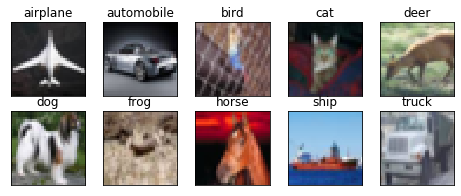

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 75ms/step - loss: 1.9757 - acc: 0.2374 - val_loss: 1.5689 - val_acc: 0.4100
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.4033 - acc: 0.4889 - val_loss: 1.1302 - val_acc: 0.5899
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1450 - acc: 0.5945 - val_loss: 0.9987 - val_acc: 0.6446
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9897 - acc: 0.6537 - val_loss: 0.8121 - val_acc: 0.7180
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8901 - acc: 0.6918 - val_loss: 0.7970 - val_acc: 0.7260
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8144 - acc: 0.7209 - val_loss: 0.7323 - val_acc: 0.7481
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7588 - acc: 0.7411 - val_loss: 0.7030 - val_acc: 0.7579
Epoch 8/50
390/390 [==============================] - 

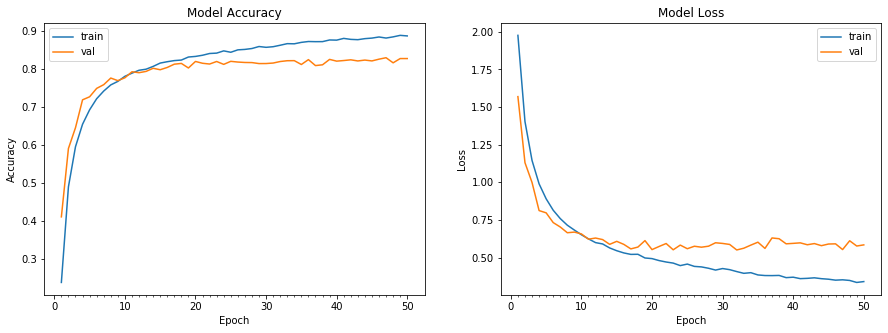

Accuracy on test data is: 82.66


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model - after removing dense layers at the end
model = Sequential()
model.add(SeparableConvolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #(outputsize - 32, Receptive Field - 3)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(48, 3, 3)) #(30, 5)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(15, 6)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(96, 3, 3, border_mode='same')) #(15, 10)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(96, 3, 3)) #(13, 14)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(6, 16)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(192, 3, 3, border_mode='same')) #(6, 24)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(192, 3, 3)) #(4, 32)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(2, 36)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(96, 2, 2)) #(1, 44)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(num_classes, 1, 1)) #(1, 44)
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_73 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
activation_98 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_74 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
activation_99 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 30, 30, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 40s 102ms/step - loss: 1.6298 - acc: 0.4200 - val_loss: 1.3403 - val_acc: 0.5348
Epoch 2/50
390/390 [==============================] - 33s 84ms/step - loss: 1.1516 - acc: 0.5945 - val_loss: 1.1136 - val_acc: 0.6216
Epoch 3/50
390/390 [==============================] - 33s 85ms/step - loss: 0.9844 - acc: 0.6550 - val_loss: 0.9029 - val_acc: 0.6886
Epoch 4/50
390/390 [==============================] - 32s 83ms/step - loss: 0.8891 - acc: 0.6865 - val_loss: 0.9014 - val_acc: 0.6915
Epoch 5/50
390/390 [==============================] - 33s 84ms/step - loss: 0.8271 - acc: 0.7107 - val_loss: 0.8026 - val_acc: 0.7230
Epoch 6/50
390/390 [==============================] - 33s 84ms/step - loss: 0.7783 - acc: 0.7296 - val_loss: 0.8323 - val_acc: 0.7220
Epoch 7/50
390/390 [==============================] - 33s 84ms/step - loss: 0.7338 - acc: 0.7400 - val_loss: 0.7251 - val_acc: 0.7527
Epoch 8/50
390/390 [==============================] - 32s 83m

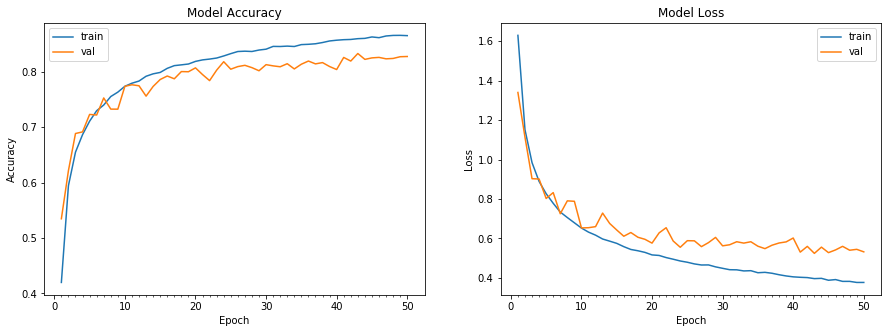

Accuracy on test data is: 82.75


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [10]:
# Define the model - by following vgg 16 architecture
# Define the model - after removing dense layers at the end
model = Sequential()
model.add(SeparableConvolution2D(48, 3, 3, border_mode='same', use_bias= False, input_shape=(32, 32, 3))) #(outputsize - 32, Receptive Field - 3)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(48, 3, 3, use_bias= False)) #(30, 5)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(15, 6)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(96, 3, 3, use_bias= False, border_mode='same')) #(15, 10)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(96, 3, 3, use_bias= False)) #(13, 14)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(6, 16)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(192, 3, 3, use_bias= False, border_mode='same')) #(6, 24)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(192, 3, 3, use_bias= False)) #(4, 32)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(MaxPooling2D(pool_size=(2, 2))) #(2, 36)
model.add(Dropout(0.2))

model.add(SeparableConvolution2D(96, 2, 2, use_bias= False)) #(1, 44)
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.08))

model.add(SeparableConvolution2D(num_classes, 1, 1, use_bias= False)) #(1, 44)
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), use_bias=False, input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), use_bias=False)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), use_bia

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_9 (Separabl (None, 32, 32, 48)        171       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_10 (Separab (None, 30, 30, 48)        2736      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 48)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 18s 46ms/step - loss: 1.6471 - acc: 0.4156 - val_loss: 1.2999 - val_acc: 0.5505
Epoch 2/50
390/390 [==============================] - 16s 41ms/step - loss: 1.2041 - acc: 0.5745 - val_loss: 1.1947 - val_acc: 0.5853
Epoch 3/50
390/390 [==============================] - 16s 41ms/step - loss: 1.0343 - acc: 0.6355 - val_loss: 1.0917 - val_acc: 0.6222
Epoch 4/50
390/390 [==============================] - 16s 41ms/step - loss: 0.9438 - acc: 0.6695 - val_loss: 0.9607 - val_acc: 0.6730
Epoch 5/50
390/390 [==============================] - 16s 41ms/step - loss: 0.8692 - acc: 0.6947 - val_loss: 0.9462 - val_acc: 0.6823
Epoch 6/50
390/390 [==============================] - 16s 41ms/step - loss: 0.8207 - acc: 0.7142 - val_loss: 0.8421 - val_acc: 0.7126
Epoch 7/50
390/390 [==============================] - 16s 41ms/step - loss: 0.7777 - acc: 0.7287 - val_loss: 0.8211 - val_acc: 0.7210
Epoch 8/50
390/390 [==============================] - 16s 41ms

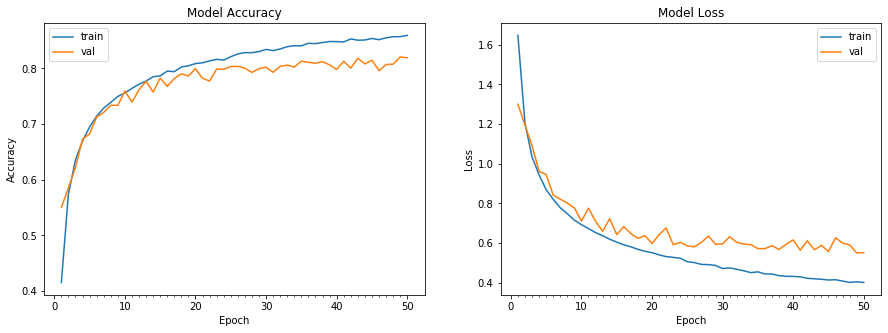

Accuracy on test data is: 81.91


In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),  verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))